# Miniproyecto 2

## Integrantes del equipo

Rodrigo Zea

Sebastian Arriola

In [4]:
import math
from random import seed, random
import matplotlib.pyplot as plt
import numpy as np

## Problema 1

### Composición

In [2]:
%%latex
\begin{align}
F_x(x) = \sum_{i=1}^{\infty} p_i F_i(x) \\
\end{align}

<IPython.core.display.Latex object>

In [3]:
%%latex
\begin{align}
F_i \text{ también son funciones de probabilidad acumulada, } p_i \geq 0 \text{ para todo j y} \sum p_i = 1 \text{ si las densidades existen entonces:}\\
\end{align}

<IPython.core.display.Latex object>

In [4]:
%%latex
\begin{align}
f_x(x) = \sum_{i=1}^{\infty} p_i f_i(x) \\
\end{align}

<IPython.core.display.Latex object>

### Algoritmo de Composición

In [5]:

%%latex
\begin{align}
\text{ 1. Generar I distributiva sobre enteros no negativos tal que } P(I = n) = p_n \\
\text{ 2. Si I = j, entonces simular } Y_i \text{ desde } F_i  \\
\text{ 3. } X = Y_i  \\
\end{align}

<IPython.core.display.Latex object>

### Prueba

In [6]:
%%latex
\begin{align}
P(X \leq x) = \sum_{i=1}^{\infty} P(X \leq x | I = i) \\
P(X \leq x) = \sum_{i=1}^{\infty} P(Y_i \leq x) P(I = i) \\
P(X \leq x) = \sum_{i=1}^{\infty} F_i(x) p_i \\
P(X \leq x) = F_x(x) \\
\end{align}

<IPython.core.display.Latex object>

## Problema 2 - Ejemplo con Distribución Hiperexponencial
Parámetros:
- a1 = 0.1
- a2 = 0.9
- l1 = 0.5
- l2 = 1.5

Nota: los valores de los parámetros fueron tomados de: https://www.boost.org/doc/libs/1_60_0/libs/math/doc/html/math_toolkit/dist_ref/dists/hyperexponential_dist.html

(array([ 636.,  714.,  780.,  833.,  948.,  802.,  986., 1135., 1377.,
        1789.]),
 array([2.92497401e-06, 7.76857461e-02, 1.55368567e-01, 2.33051388e-01,
        3.10734209e-01, 3.88417030e-01, 4.66099852e-01, 5.43782673e-01,
        6.21465494e-01, 6.99148315e-01, 7.76831136e-01]),
 <BarContainer object of 10 artists>)

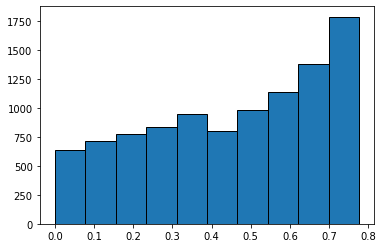

In [252]:
a1, a2, l1, l2 = 0.1, 0.9, 0.5, 1.5
f1 = lambda x: 1 - math.e**(-l1 * x)
f2 = lambda x: 1 - math.e**(-l2 * x)

n = []
for _ in range(10000):
    u1 = random()
    u2 = random()
    x = f1(u2) if u1 <= a1 else f2(u2)
    n.append(x)
plt.hist(n, edgecolor='black')

## Problema 3

In [2]:
hotel = [
    (-800, 0, False),
    (-800, 50, True),
    (-800, 100, True),
    (-700, 150, True),
    (300, 200, True),
    (400, 200, True),
    (500, 200, True),
    (200, 8440, False)
]

In [3]:
cc = [
    (-900, 0, False),
    (-600, 50, True),
    (-200, 50, True),
    (-600, 100, True),
    (250, 150, True),
    (350, 150, True),
    (400, 150, True),
    (1600, 6000, False)
]

In [5]:
def vpn(f, t, r):
    if t == 0:
        return f
    return f/(1+r)**t

### 100 Iteraciones

In [7]:
ph = 0
pcc = 0

for i in range(100):
    actual_val_hotel = 0
    for i in range(len(hotel)):
        if (hotel[i][2] == True):
            f = np.random.normal(hotel[i][0], hotel[i][1])
        else:
            f = np.random.uniform(hotel[i][0] - hotel[i][1], hotel[i][0] + hotel[i][1])
            
        actual_val_hotel += vpn(f, i, 0.10)
        
    actual_val_cc = 0
    for i in range(len(cc)):
        if (cc[i][2] == True):
            f = np.random.normal(cc[i][0], cc[i][1])
        else:
            f = np.random.uniform(cc[i][0] - cc[i][1], cc[i][0] + cc[i][1])
            
        actual_val_cc += vpn(f, i, 0.10)
        
    if actual_val_hotel > actual_val_cc:
        ph += 1
    else:
        pcc += 1

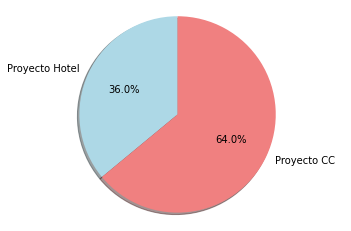

In [13]:
labels = ['Proyecto Hotel', 'Proyecto CC']
sizes = [ph, pcc]
colors = ['lightblue', 'lightcoral']
patches = plt.pie(sizes, colors=colors, shadow=True, startangle=90, autopct='%1.1f%%', labels=labels)
plt.axis('equal')
plt.show()

### 1000 Iteraciones

In [14]:
ph = 0
pcc = 0

for i in range(1000):
    actual_val_hotel = 0
    for i in range(len(hotel)):
        if (hotel[i][2] == True):
            f = np.random.normal(hotel[i][0], hotel[i][1])
        else:
            f = np.random.uniform(hotel[i][0] - hotel[i][1], hotel[i][0] + hotel[i][1])
            
        actual_val_hotel += vpn(f, i, 0.10)
        
    actual_val_cc = 0
    for i in range(len(cc)):
        if (cc[i][2] == True):
            f = np.random.normal(cc[i][0], cc[i][1])
        else:
            f = np.random.uniform(cc[i][0] - cc[i][1], cc[i][0] + cc[i][1])
            
        actual_val_cc += vpn(f, i, 0.10)
        
    if actual_val_hotel > actual_val_cc:
        ph += 1
    else:
        pcc += 1

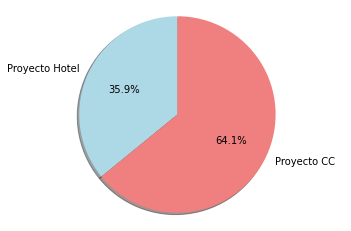

In [15]:
labels = ['Proyecto Hotel', 'Proyecto CC']
sizes = [ph, pcc]
colors = ['lightblue', 'lightcoral']
patches = plt.pie(sizes, colors=colors, shadow=True, startangle=90, autopct='%1.1f%%', labels=labels)
plt.axis('equal')
plt.show()

### 10000 Iteraciones

In [16]:
ph = 0
pcc = 0

for i in range(10000):
    actual_val_hotel = 0
    for i in range(len(hotel)):
        if (hotel[i][2] == True):
            f = np.random.normal(hotel[i][0], hotel[i][1])
        else:
            f = np.random.uniform(hotel[i][0] - hotel[i][1], hotel[i][0] + hotel[i][1])
            
        actual_val_hotel += vpn(f, i, 0.10)
        
    actual_val_cc = 0
    for i in range(len(cc)):
        if (cc[i][2] == True):
            f = np.random.normal(cc[i][0], cc[i][1])
        else:
            f = np.random.uniform(cc[i][0] - cc[i][1], cc[i][0] + cc[i][1])
            
        actual_val_cc += vpn(f, i, 0.10)
        
    if actual_val_hotel > actual_val_cc:
        ph += 1
    else:
        pcc += 1

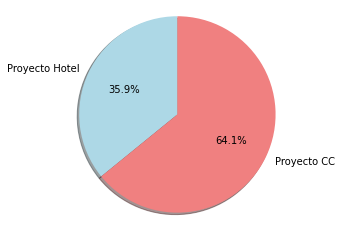

In [17]:
labels = ['Proyecto Hotel', 'Proyecto CC']
sizes = [ph, pcc]
colors = ['lightblue', 'lightcoral']
patches = plt.pie(sizes, colors=colors, shadow=True, startangle=90, autopct='%1.1f%%', labels=labels)
plt.axis('equal')
plt.show()

## Problema 4

In [7]:
cost_price = 1.5
sale_price = 2.5
refund_price = 0.5

# cuando se compran 9 al dia
sold_one_month_9 = (9 * 31)
sold_one_year_9 = (9 * 365)
sold_ten_years_9 = (9 * 3650)
print(f'Comprando 9 al dia, 1 mes: ${sold_one_month_9}')
print(f'Comprando 9 al dia, 1 año: ${sold_one_year_9}')
print(f'Comprando 9 al dia, 10 años: ${sold_ten_years_9}')
print()

# Cuando se compran 10 al dia
results = []
for interval in [31, 365, 3650]:
    sold, refunded = 0, 0
    for i in range(interval):
        p = random()
        if p < 0.3:
            sold += 9
            refunded += 1
        else:
            sold += 10
    results.append((sold * sale_price) + (refunded * refund_price) - (10 * cost_price * interval))

print(f'Comprando 10 al dia, 1 mes: ${results[0]}')
print(f'Comprando 10 al dia, 1 año: ${results[1]}')
print(f'Comprando 10 al dia, 10 años: ${results[2]}')
print()

# Cuando se compran 11 al dia
results = []
for interval in [31, 365, 3650]:
    sold, refunded = 0, 0
    for i in range(interval):
        p = random()
        if p < 0.3:
            sold += 9
            refunded += 2
        elif p < 0.6:
            sold += 10
            refunded += 1
        else:
            sold += 11
    results.append((sold * sale_price) + (refunded * refund_price) - (11 * cost_price * interval))

print(f'Comprando 11 al dia, 1 mes: ${results[0]}')
print(f'Comprando 11 al dia, 1 año: ${results[1]}')
print(f'Comprando 11 al dia, 10 años: ${results[2]}')

Comprando 9 al dia, 1 mes: $279
Comprando 9 al dia, 1 año: $3285
Comprando 9 al dia, 10 años: $32850

Comprando 10 al dia, 1 mes: $296.0
Comprando 10 al dia, 1 año: $3438.0
Comprando 10 al dia, 10 años: $34222.0

Comprando 11 al dia, 1 mes: $269.0
Comprando 11 al dia, 1 año: $3397.0
Comprando 11 al dia, 10 años: $33456.0
